<a href="https://colab.research.google.com/github/mwaqaskhan2002/Multi-Class-Sentiment-Classification-using-BERT/blob/main/Sentiment_Analysis_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00


# Multi-Class Sentiment Classification using BERT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [5]:
data = pd.read_csv('twitter_multi_class_sentiment.csv')
data.head(10)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


## DataSet Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [7]:
print("No. of Rows:", data.shape[0])
print("No. of Columns:", data.shape[1])

No. of Rows: 16000
No. of Columns: 3


In [8]:
print(data.columns)

Index(['text', 'label', 'label_name'], dtype='object')


In [9]:
data.isnull().sum()

,0
text,0
label,0
label_name,0


No. of labels:
 label
5     572
2    1304
4    1937
3    2159
0    4666
1    5362
Name: count, dtype: int64


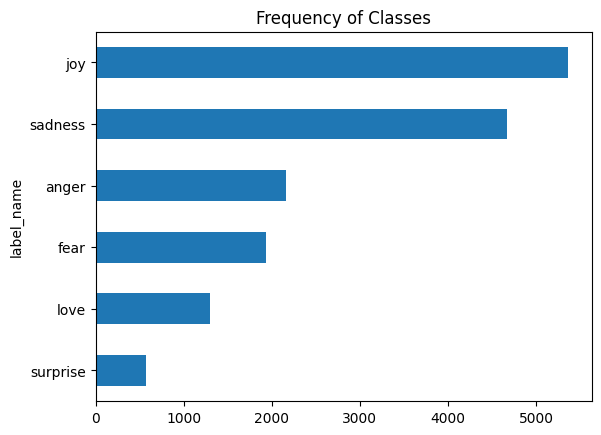

In [10]:
print('No. of labels:\n', data['label'].value_counts(ascending=True))
label_counts = data['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [11]:
data['No of Words'] = data['text'].str.split().apply(len)
data.head()

,text,label,label_name,No of Words
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


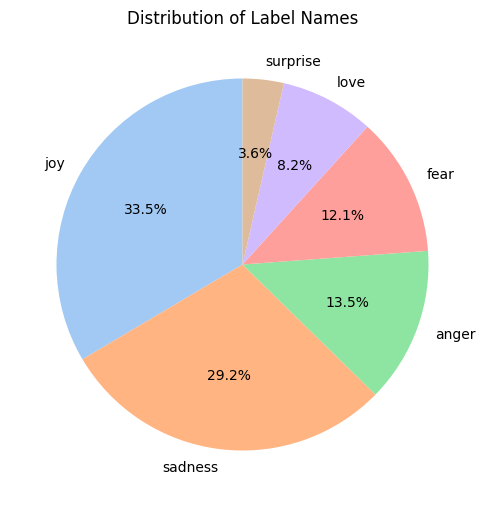

In [12]:
label_counts = data['label_name'].value_counts()

plt.figure(figsize=(6, 15))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribution of Label Names")
plt.show()

In [13]:
for i in range(10):
    print("Text:",[i], data['text'].iloc[i])

Text: [0] i didnt feel humiliated
Text: [1] i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Text: [2] im grabbing a minute to post i feel greedy wrong
Text: [3] i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Text: [4] i am feeling grouchy
Text: [5] ive been feeling a little burdened lately wasnt sure why that was
Text: [6] ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
Text: [7] i feel as confused about life as a teenager or as jaded as a year old man
Text: [8] i have been with petronas for years i feel that petronas has performed well and made a huge profit
Text: [9] i feel romantic too


In [14]:
from transformers import AutoTokenizer

Model = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(Model)

#Testing Pretrained Model
text = "I love machine learning!. It is the most emerging field in the market"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 1012, 2009, 2003, 1996, 2087, 8361, 2492, 1999, 1996, 3006, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, stratify=data['label_name'])
test, validation = train_test_split(test, test_size = 1/3, stratify=test['label_name'])
print("Train:", train.shape)
print("Test:", test.shape)
print("Validation:", validation.shape)


Train: (11200, 4)
Test: (3200, 4)
Validation: (1600, 4)


In [19]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
    }
)
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'No of Words'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'No of Words'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'No of Words'],
        num_rows: 1600
    })
})


## Tokenization of Sentiment Data

In [20]:
dataset['train'][0], dataset['train'][1]

({'text': 'i go off to sleep and i say i m feeling exhausted and suddenly i go into thoughts about how i m working too hard how i can never get the balance right how i feel like it s all too hard etc i go into a whole story about my life where everything seems overwhelming',
  'label': 0,
  'label_name': 'sadness',
  'No of Words': 56},
 {'text': 'i finally allowed my feelings up and accepted them and myself the internal boundary began to dissolve i began to see how i was projecting my suppressed feelings out and creating a lot of pain in and around me',
  'label': 1,
  'label_name': 'joy',
  'No of Words': 39})

In [21]:
def tokenize(batch):
    temp = tokenizer(batch['text'], padding=True, truncation=True)
    return temp
print(tokenize(dataset['train'][0]))

{'input_ids': [101, 1045, 2175, 2125, 2000, 3637, 1998, 1045, 2360, 1045, 1049, 3110, 9069, 1998, 3402, 1045, 2175, 2046, 4301, 2055, 2129, 1045, 1049, 2551, 2205, 2524, 2129, 1045, 2064, 2196, 2131, 1996, 5703, 2157, 2129, 1045, 2514, 2066, 2009, 1055, 2035, 2205, 2524, 4385, 1045, 2175, 2046, 1037, 2878, 2466, 2055, 2026, 2166, 2073, 2673, 3849, 10827, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [22]:
emotion_encoded = dataset.map(tokenize, batch_size=None, batched=True)
emotion_encoded

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'No of Words', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'No of Words', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'No of Words', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [23]:
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'sadness': 0, 'joy': 1, 'fear': 4, 'anger': 3, 'surprise': 5, 'love': 2},
 {0: 'sadness', 1: 'joy', 4: 'fear', 3: 'anger', 5: 'surprise', 2: 'love'})

## Model Building

In [24]:
from transformers import AutoModelForSequenceClassification, AutoConfig, TrainingArguments, Trainer
import torch

In [25]:
#model = AutoModel.from_pretrained(Model)

In [26]:
#model.config

In [27]:
num_labels = len(id2label)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = AutoConfig.from_pretrained(Model, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(Model, config=config).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
batch_size = 64
training_dir = 'bert_base_train_dir'

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    eval_strategy='epoch',
    disable_tqdm=False,
)


In [32]:
import evaluate
import numpy as np


accuracy = evaluate.load("accuracy")
def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [33]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(y_true=labels, y_pred=preds, average='weighted')
    acc = accuracy_score(y_true=labels, y_pred=preds)

    return {"accuracy": acc, "f1": f1}

## Build Model Trainer

In [34]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer = tokenizer
)

print(tokenizer)

<ipython-input-34-21209b6fd6b7>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


In [35]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.405352,0.869375,0.862252
2,No log,0.263294,0.913125,0.912609


TrainOutput(global_step=350, training_loss=0.647392098563058, metrics={'train_runtime': 360.7703, 'train_samples_per_second': 62.089, 'train_steps_per_second': 0.97, 'total_flos': 897898722739200.0, 'train_loss': 0.647392098563058, 'epoch': 2.0})

# Model Evaluation

In [36]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.2933608293533325,
 'test_accuracy': 0.9034375,
 'test_f1': 0.9032438860365928,
 'test_runtime': 12.1537,
 'test_samples_per_second': 263.295,
 'test_steps_per_second': 4.114}

In [37]:
y_pred = np.argmax(preds_output.predictions, axis = 1)
y_true = emotion_encoded['test'][:]['label']
emotion_encoded['test'][0]

{'text': 'i feel like i must defend my beloved blue hehe',
 'label': 2,
 'label_name': 'love',
 'No of Words': 10,
 'input_ids': [101,
  1045,
  2514,
  2066,
  1045,
  2442,
  6985,
  2026,
  11419,
  2630,
  2002,
  5369,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
 

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       933
           1       0.92      0.93      0.92      1072
           2       0.80      0.74      0.77       261
           3       0.91      0.91      0.91       432
           4       0.90      0.83      0.86       387
           5       0.71      0.87      0.78       115

    accuracy                           0.90      3200
   macro avg       0.86      0.87      0.87      3200
weighted avg       0.90      0.90      0.90      3200



In [39]:
label2id

{'sadness': 0, 'joy': 1, 'fear': 4, 'anger': 3, 'surprise': 5, 'love': 2}

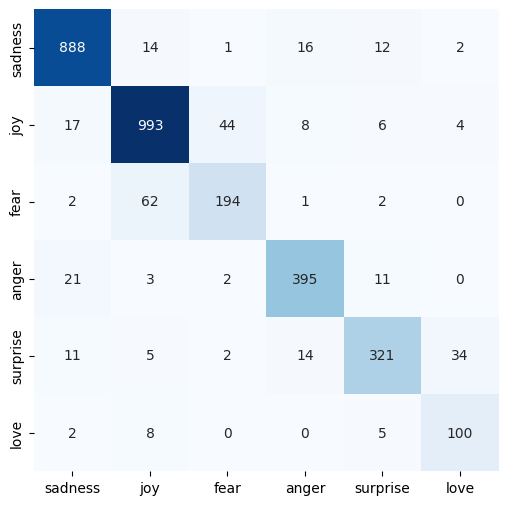

In [40]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', vmin=0, cmap='Blues', cbar=False, xticklabels=label2id.keys(), yticklabels=label2id.keys())
plt.show()

# Build Prediction Function and Store Model

In [41]:
def get_prediction(text):
    input_encoded = tokenizer(text, return_tensors='pt').to(device)

    with torch.no_grad():
        output = model(**input_encoded)
        logits = output.logits
        pred = torch.argmax(logits, dim=-1).item()
    return id2label[pred]

text = "I am super happy today. I got it done. Finally!!!!"
get_prediction(text)

'joy'

In [42]:
text = "I am done with you!"
get_prediction(text)


'anger'

In [43]:
trainer.save_model('bert-base-uncased-sentiment-model')